In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("/kaggle/input/performance/academic_performance.csv")

df.head()

,Student_ID,Gender,Age,Math_score,Reading_score,Writing_score,Study_hours_per_day,Attendance_percentage,Pass_Status
0,143,female,17.0,55.0,NaN,50,9.3,76,FAIL
1,676,NaN,27.0,33.0,40.0,12,4.3,69,pass
2,740,NaN,18.0,64.0,69.0,93,2.4,83,NaN
3,292,Male,16.0,77.0,-19.0,12,3.0,77,Fail
4,93,male,18.0,83.0,42.0,117,-0.8,86,Fail


**1. Scan for Missing Values & Inconsistencies**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             1020 non-null   int64  
 1   Gender                 811 non-null    object 
 2   Age                    970 non-null    float64
 3   Math_score             970 non-null    float64
 4   Reading_score          968 non-null    float64
 5   Writing_score          1020 non-null   int64  
 6   Study_hours_per_day    1020 non-null   float64
 7   Attendance_percentage  1020 non-null   int64  
 8   Pass_Status            805 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 71.8+ KB


In [37]:
#Check missing values
df.isnull().sum()

Student_ID                 0
Gender                   209
Age                       50
Math_score                50
Reading_score             52
Writing_score              0
Study_hours_per_day        0
Attendance_percentage      0
Pass_Status              215
dtype: int64

In [38]:
#Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Math_score'] = df['Math_score'].fillna(df['Math_score'].mean())
df['Reading_score'] = df['Reading_score'].fillna(df['Reading_score'].mean())

In [39]:
#Normalize text values
df['Gender'] = df['Gender'].str.capitalize()
df['Pass_Status'] = df['Pass_Status'].str.capitalize()

In [40]:
#Replace invalid categories
df['Gender'] = df['Gender'].replace({'male': 'Male', 'female': 'Female'})
df['Pass_Status'] = df['Pass_Status'].replace({'pass': 'Pass', 'FAIL': 'Fail'})

In [41]:
#Remove Duplicate Records
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [42]:
#Fix Age range
df['Age'] = df['Age'].clip(lower=15, upper=25)

In [43]:
#Fix score ranges
df['Math_score'] = df['Math_score'].clip(0, 100)
df['Reading_score'] = df['Reading_score'].clip(0, 100)
df['Writing_score'] = df['Writing_score'].clip(0, 100)

In [44]:
#Fix attendance
df['Attendance_percentage'] = df['Attendance_percentage'].clip(0, 100)

In [45]:
#Fix study hours
df['Study_hours_per_day'] = df['Study_hours_per_day'].clip(0)

**2. Outlier Detection**

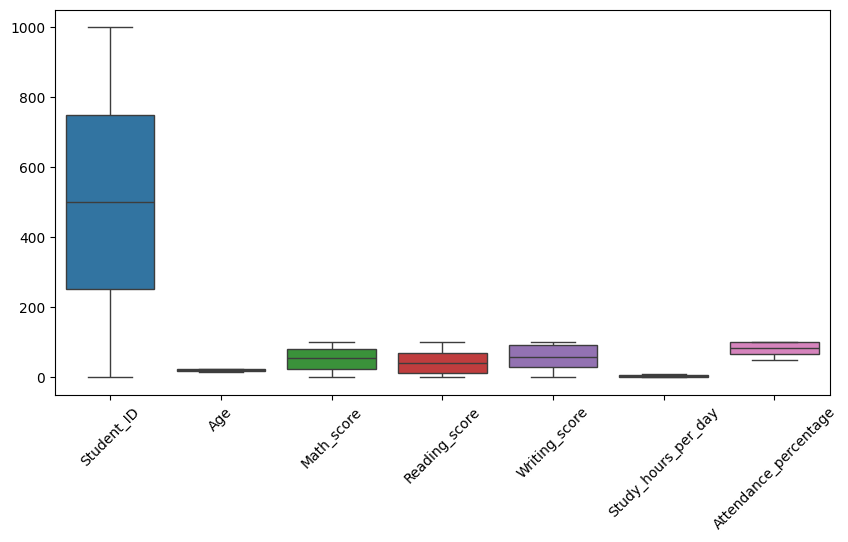

In [46]:
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()


**3. Data Transformation**

In [47]:
df['Math_score'].skew()

np.float64(0.0001985728708216602)

In [48]:
df['Math_score_log'] = np.log1p(df['Math_score'])

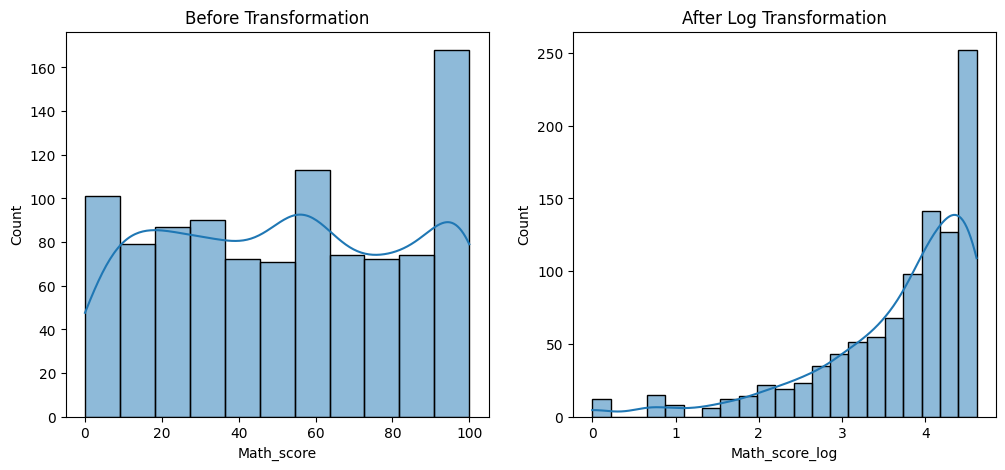

In [49]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Math_score'], kde=True)
plt.title("Before Transformation")

plt.subplot(1,2,2)
sns.histplot(df['Math_score_log'], kde=True)
plt.title("After Log Transformation")

plt.show()
